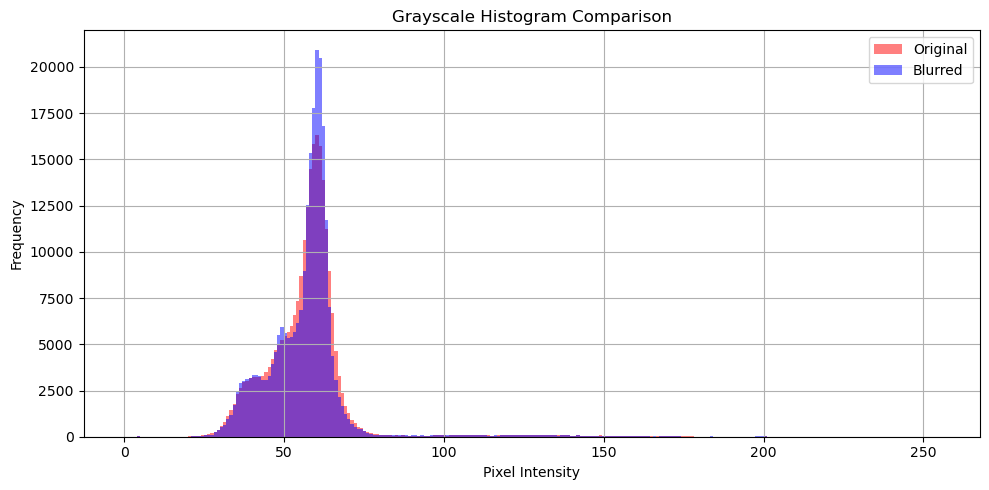

Kolmogorov-Smirnov Test Results:
Statistic: 0.0273
P-value: 9.9998e-01
Result: No significant difference between grayscale histograms of the original image and its blurred version (p ≥ 0.05).
Blurred image saved to: blurred_image.png
Downscaled image saved to: blurred_image_250x250.png


In [2]:
# I acknowledge the use of ChatGPT to assist with writing this program.

# Step 1: Import required libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Step 2: Read the 500x500 grayscale PNG image
input_path = "original_image.png"  # Make sure your image is in the same folder or adjust the path
image = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)  # Read grayscale image

if image is None:
    raise FileNotFoundError("Image not found at {}".format(input_path))
elif image.shape != (500, 500):
    raise ValueError("Image size is {}, expected (500, 500)".format(image.shape))

# Step 3: Apply Gaussian blur to produce the blurred version of the original image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Step 4: Compute grayscale histograms
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
hist_blur = cv2.calcHist([blurred], [0], None, [256], [0, 256]).flatten()

# Step 5: Plot both histograms as bar-style histograms
plt.figure(figsize=(10, 5))
plt.hist(np.arange(256), bins=256, weights=hist_original, color='red', alpha=0.5, label='Original')
plt.hist(np.arange(256), bins=256, weights=hist_blur, color='blue', alpha=0.5, label='Blurred')
plt.title("Grayscale Histogram Comparison")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 6: Use Kolmogorov-Smirnov test to compare two distributions
statistic, p_value = ks_2samp(hist_original, hist_blur)

# Print out results
print("Kolmogorov-Smirnov Test Results:")
print("Statistic: {:.4f}".format(statistic))
print("P-value: {:.4e}".format(p_value))

if p_value < 0.05:
    print("Result: The grayscale histograms are significantly different (p < 0.05).")
else:
    print("Result: No significant difference between grayscale histograms of the original image and its blurred version (p ≥ 0.05).")

# Step 7: Save the blurred image
blurred_path = "blurred_image.png"
cv2.imwrite(blurred_path, blurred)
print("Blurred image saved to: {}".format(blurred_path))

# Step 8: Save a downscaled 250x250 version of the blurred image
resized_blurred = cv2.resize(blurred, (250, 250), interpolation=cv2.INTER_AREA)
resized_path = "blurred_image_250x250.png"
cv2.imwrite(resized_path, resized_blurred)
print("Downscaled image saved to: {}".format(resized_path))
